In [1]:
5

5

In [2]:
# import tensorflow as tf

In [3]:
# tf.constant(5)

# Libraries

In [4]:
# import sklearn
# import imblearn
# print("scikit-learn version:", sklearn.__version__)
# print("imbalanced-learn version:",imblearn.__version__)

In [5]:
# %pip install imbalanced-learn
# %pip install scikit-learn==1.2.2

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

# Dealing with Data

In [45]:
df = pd.read_csv('Maintenance_Info2.csv')

In [46]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [47]:
# df['Air temperature [K]'] = df['Air temperature [K]'] - 273.15
# df['Process temperature [K]'] = df['Process temperature [K]'] - 273.15

In [48]:
# df.head()

In [49]:
df.shape

(10000, 10)

In [50]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [51]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

df['Type'] = LabelEncoder().fit_transform(df['Type'])

df.fillna(df.median(numeric_only=True), inplace=True)

numeric_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [10]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,No Failure
1,1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,No Failure
2,1,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,No Failure
3,1,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,No Failure
4,1,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,No Failure


In [11]:
df['Failure Type'].value_counts().unique()

array([9652,  112,   95,   78,   45,   18], dtype=int64)

## Boderline-SMOTE

In [56]:
X = df.drop('Failure Type', axis=1)
X = X.drop('Target', axis=1)  
X = X.drop('Tool wear [min]', axis=1)
y = df['Failure Type']

In [26]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [58]:
print("Before Borderline-SMOTE:", Counter(y_train))

Before Borderline-SMOTE: Counter({'No Failure': 7722, 'Heat Dissipation Failure': 90, 'Power Failure': 76, 'Overstrain Failure': 62, 'Tool Wear Failure': 36, 'Random Failures': 14})


In [59]:
X_train_preprocessed = X_train.copy()

In [60]:
sampling_strategy = {
    'Tool Wear Failure': 3000,
    'Overstrain Failure': 3000,
    'Heat Dissipation Failure': 3000,
    'Power Failure': 3000,
    'Random Failures': 3000
}

In [61]:
smote = BorderlineSMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

In [62]:

print("After Borderline-SMOTE:", Counter(y_resampled))
print("Total rows after resampling:", len(X_resampled))

After Borderline-SMOTE: Counter({'No Failure': 7722, 'Tool Wear Failure': 3000, 'Random Failures': 3000, 'Power Failure': 3000, 'Heat Dissipation Failure': 3000, 'Overstrain Failure': 3000})
Total rows after resampling: 22722


In [39]:
X_resampled.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm]
0,2,0.197519,1.209468,-0.986060,0.763720
1,2,-0.152453,-0.475554,-0.779674,0.191915
2,2,0.897464,-0.273351,-0.573287,0.904163
3,1,0.197519,-0.071148,0.157433,-0.349795
4,2,-0.952389,-1.419166,-0.902390,1.516095


In [65]:
y_labels = le.fit_transform(y_resampled)

In [66]:
y_labels

array([1, 5, 1, ..., 5, 5, 5])

In [64]:
y_resampled

0               No Failure
1        Tool Wear Failure
2               No Failure
3               No Failure
4               No Failure
               ...        
22717    Tool Wear Failure
22718    Tool Wear Failure
22719    Tool Wear Failure
22720    Tool Wear Failure
22721    Tool Wear Failure
Name: Failure Type, Length: 22722, dtype: object

In [71]:
# import pandas as pd

# df_resampled = X_resampled.copy()
# df_resampled['Failure Type'] = y_resampled  

# df4.to_csv('boderline_smote_data.csv', index=False)


In [73]:
# df4.head()

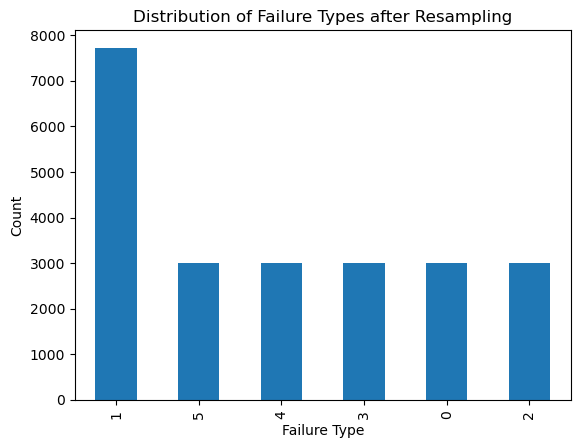

In [43]:
import matplotlib.pyplot as plt
df_resampled['Failure Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Failure Types after Resampling')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()

## SMOTE-NC

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTENC
from collections import Counter

In [74]:
X = df.drop('Failure Type', axis=1)
X = X.drop('Target', axis=1)  
X = X.drop('Tool wear [min]', axis=1)
y = df['Failure Type']

In [75]:
categorical_cols = ['Type']
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

In [76]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

In [78]:
print("Before SMOTE-NC:", Counter(y_train))

Before SMOTE-NC: Counter({1: 7722, 0: 90, 3: 76, 2: 62, 5: 36, 4: 14})


In [81]:
smote_nc = SMOTENC(categorical_features=categorical_indices, sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

In [82]:
print("After SMOTE-NC:", Counter(y_resampled))

After SMOTE-NC: Counter({1: 7722, 5: 7722, 4: 7722, 3: 7722, 0: 7722, 2: 7722})


In [83]:
y_labels = le.inverse_transform(y_resampled)

In [85]:
y_resampled[:20], y_labels[:20]

(array([1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array(['No Failure', 'Tool Wear Failure', 'No Failure', 'No Failure',
        'No Failure', 'No Failure', 'No Failure', 'No Failure',
        'No Failure', 'No Failure', 'No Failure', 'No Failure',
        'No Failure', 'No Failure', 'No Failure', 'No Failure',
        'No Failure', 'No Failure', 'No Failure', 'No Failure'],
       dtype=object))

In [87]:
import numpy as np

unique_labels, counts = np.unique(y_labels, return_counts=True)
print(dict(zip(unique_labels, counts)))

{'Heat Dissipation Failure': 7722, 'No Failure': 7722, 'Overstrain Failure': 7722, 'Power Failure': 7722, 'Random Failures': 7722, 'Tool Wear Failure': 7722}


In [88]:
import numpy as np


unique_labels, counts = np.unique(X_resampled['Type'], return_counts=True)
print(dict(zip(unique_labels, counts)))

{0: 1769, 1: 38059, 2: 6504}


In [141]:
X_resampled.head(20)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm]
0,2,0.197519,1.209468,-0.986060,0.763720
1,2,-0.152453,-0.475554,-0.779674,0.191915
2,2,0.897464,-0.273351,-0.573287,0.904163
3,1,0.197519,-0.071148,0.157433,-0.349795
4,2,-0.952389,-1.419166,-0.902390,1.516095
5,1,-0.452429,-1.014761,0.001249,0.683466
6,0,-0.102457,-0.542955,-0.578865,0.262136
7,2,1.897384,1.613874,0.324774,-0.660777
8,1,1.347428,1.479072,-0.907968,1.285366
9,1,0.747476,0.333257,-0.405946,0.813878


In [98]:
# import pandas as pd

# df_resampled = X_resampled.copy()
# df_resampled['Failure Type'] = y_resampled  
# df_resampled['y_labels'] = y_labels  
# df_resampled.to_csv('smote_nc_data.csv', index=False)


In [99]:
df_resampled.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Failure Type,y_labels
0,2,0.197519,1.209468,-0.986060,0.763720,1,No Failure
1,2,-0.152453,-0.475554,-0.779674,0.191915,5,Tool Wear Failure
2,2,0.897464,-0.273351,-0.573287,0.904163,1,No Failure
3,1,0.197519,-0.071148,0.157433,-0.349795,1,No Failure
4,2,-0.952389,-1.419166,-0.902390,1.516095,1,No Failure


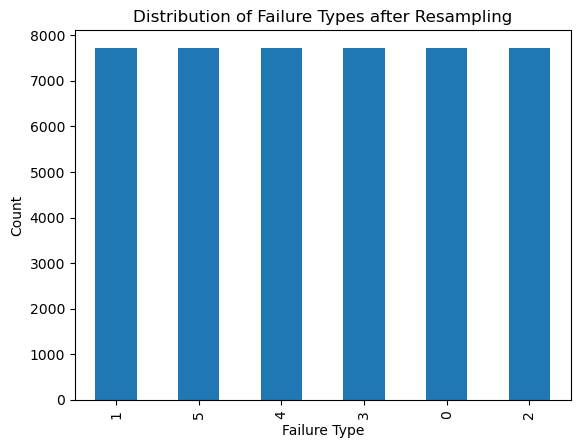

In [143]:
# Visualizing the distribution of the target variable after resampling
import matplotlib.pyplot as plt
df_resampled['Failure Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Failure Types after Resampling')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()

## Checking Extended Dataset

In [91]:
df2 = pd.read_csv('smote_nc_data.csv')
df2.shape

(46332, 7)

In [92]:
df3 = pd.read_csv('boderline_smote_data.csv')
df3.shape

(22722, 7)

In [93]:
df2

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Failure Type,y_labes
0,2,0.197519,1.209468,-0.986060,0.763720,1,No Failure
1,2,-0.152453,-0.475554,-0.779674,0.191915,5,Tool Wear Failure
2,2,0.897464,-0.273351,-0.573287,0.904163,1,No Failure
3,1,0.197519,-0.071148,0.157433,-0.349795,1,No Failure
4,2,-0.952389,-1.419166,-0.902390,1.516095,1,No Failure
...,...,...,...,...,...,...,...
46327,1,0.587342,0.470456,0.193959,-0.171261,5,Tool Wear Failure
46328,1,-0.496969,0.276889,2.044409,-1.644238,5,Tool Wear Failure
46329,1,0.257648,1.154830,-0.062450,-0.115812,5,Tool Wear Failure
46330,1,0.802053,-0.186162,-0.576666,0.541827,5,Tool Wear Failure


In [94]:
df3

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Failure Type,y_labels
0,2,0.197519,1.209468,-0.986060,0.763720,1,No Failure
1,2,-0.152453,-0.475554,-0.779674,0.191915,5,Tool Wear Failure
2,2,0.897464,-0.273351,-0.573287,0.904163,1,No Failure
3,1,0.197519,-0.071148,0.157433,-0.349795,1,No Failure
4,2,-0.952389,-1.419166,-0.902390,1.516095,1,No Failure
...,...,...,...,...,...,...,...
22717,0,0.281142,-0.297810,-0.854608,0.707882,5,Tool Wear Failure
22718,0,0.396276,-0.374866,-0.828724,0.725737,5,Tool Wear Failure
22719,0,0.397148,-0.224986,-0.860392,0.741910,5,Tool Wear Failure
22720,0,0.721892,0.515078,-0.596768,0.466270,5,Tool Wear Failure


# Visualization

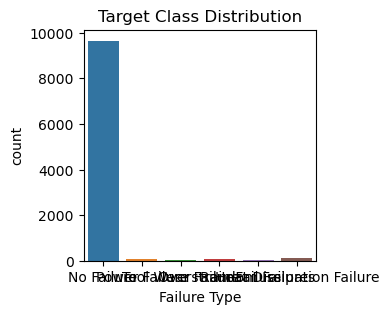

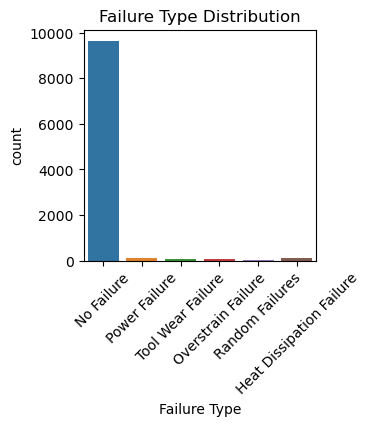

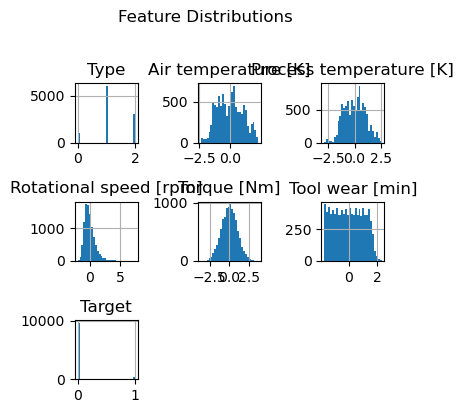

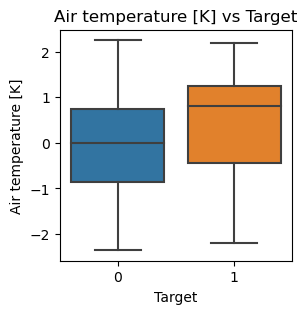

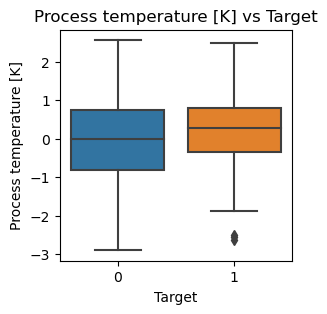

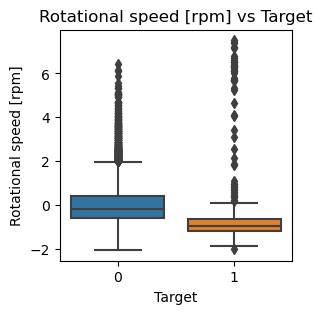

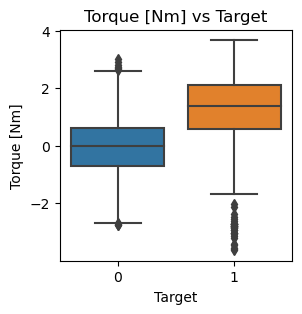

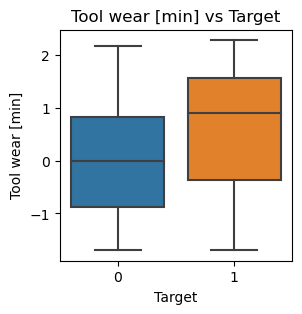

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(3,3))
sns.countplot(x='Failure Type', data=df)
plt.title("Target Class Distribution")
plt.show()

plt.figure(figsize=(3,3))
sns.countplot(x='Failure Type', data=df)
plt.title("Failure Type Distribution")
plt.xticks(rotation=45)
plt.show()



df.hist(bins=30, figsize=(4,4))
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()
for col in numeric_cols:
    plt.figure(figsize=(3,3))
    sns.boxplot(data=df, x='Target', y=col)
    plt.title(f"{col} vs Target")
    plt.show()

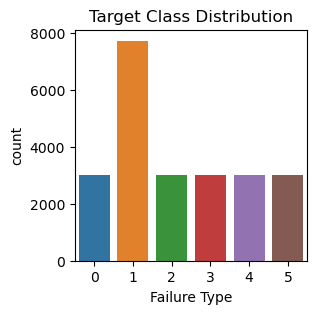

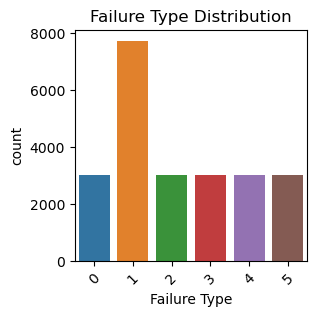

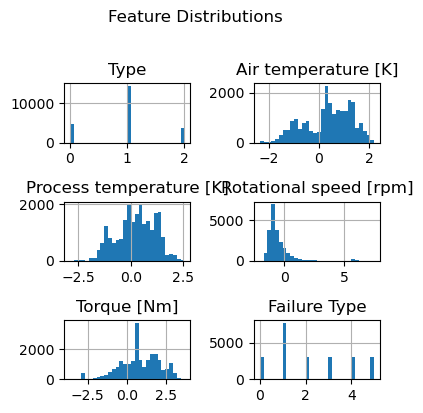

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df2 = pd.read_csv('boderline_smote_data.csv')
df2.drop('y_labels', axis=1, inplace=True)

plt.figure(figsize=(3,3))
sns.countplot(x='Failure Type', data=df2)
plt.title("Target Class Distribution")
plt.show()

plt.figure(figsize=(3,3))
sns.countplot(x='Failure Type', data=df2)
plt.title("Failure Type Distribution")
plt.xticks(rotation=45)
plt.show()



df2.hist(bins=30, figsize=(4,4))
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()


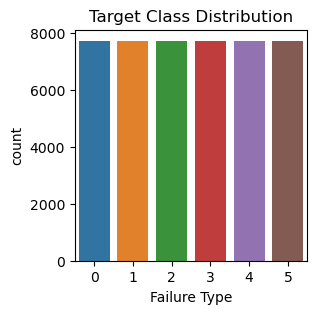

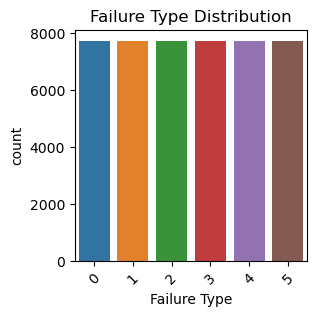

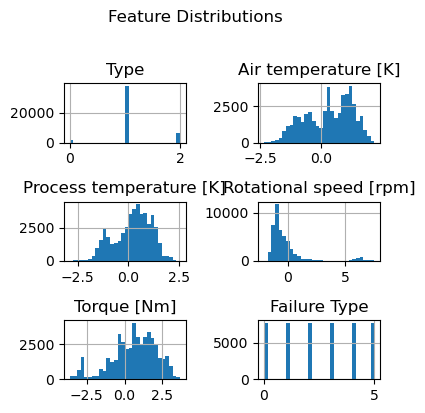

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df3 = pd.read_csv('smote_nc_data.csv')
df3.drop('y_labels', axis=1, inplace=True)

plt.figure(figsize=(3,3))
sns.countplot(x='Failure Type', data=df3)
plt.title("Target Class Distribution")
plt.show()

plt.figure(figsize=(3,3))
sns.countplot(x='Failure Type', data=df3)
plt.title("Failure Type Distribution")
plt.xticks(rotation=45)
plt.show()



df3.hist(bins=30, figsize=(4,4))
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()


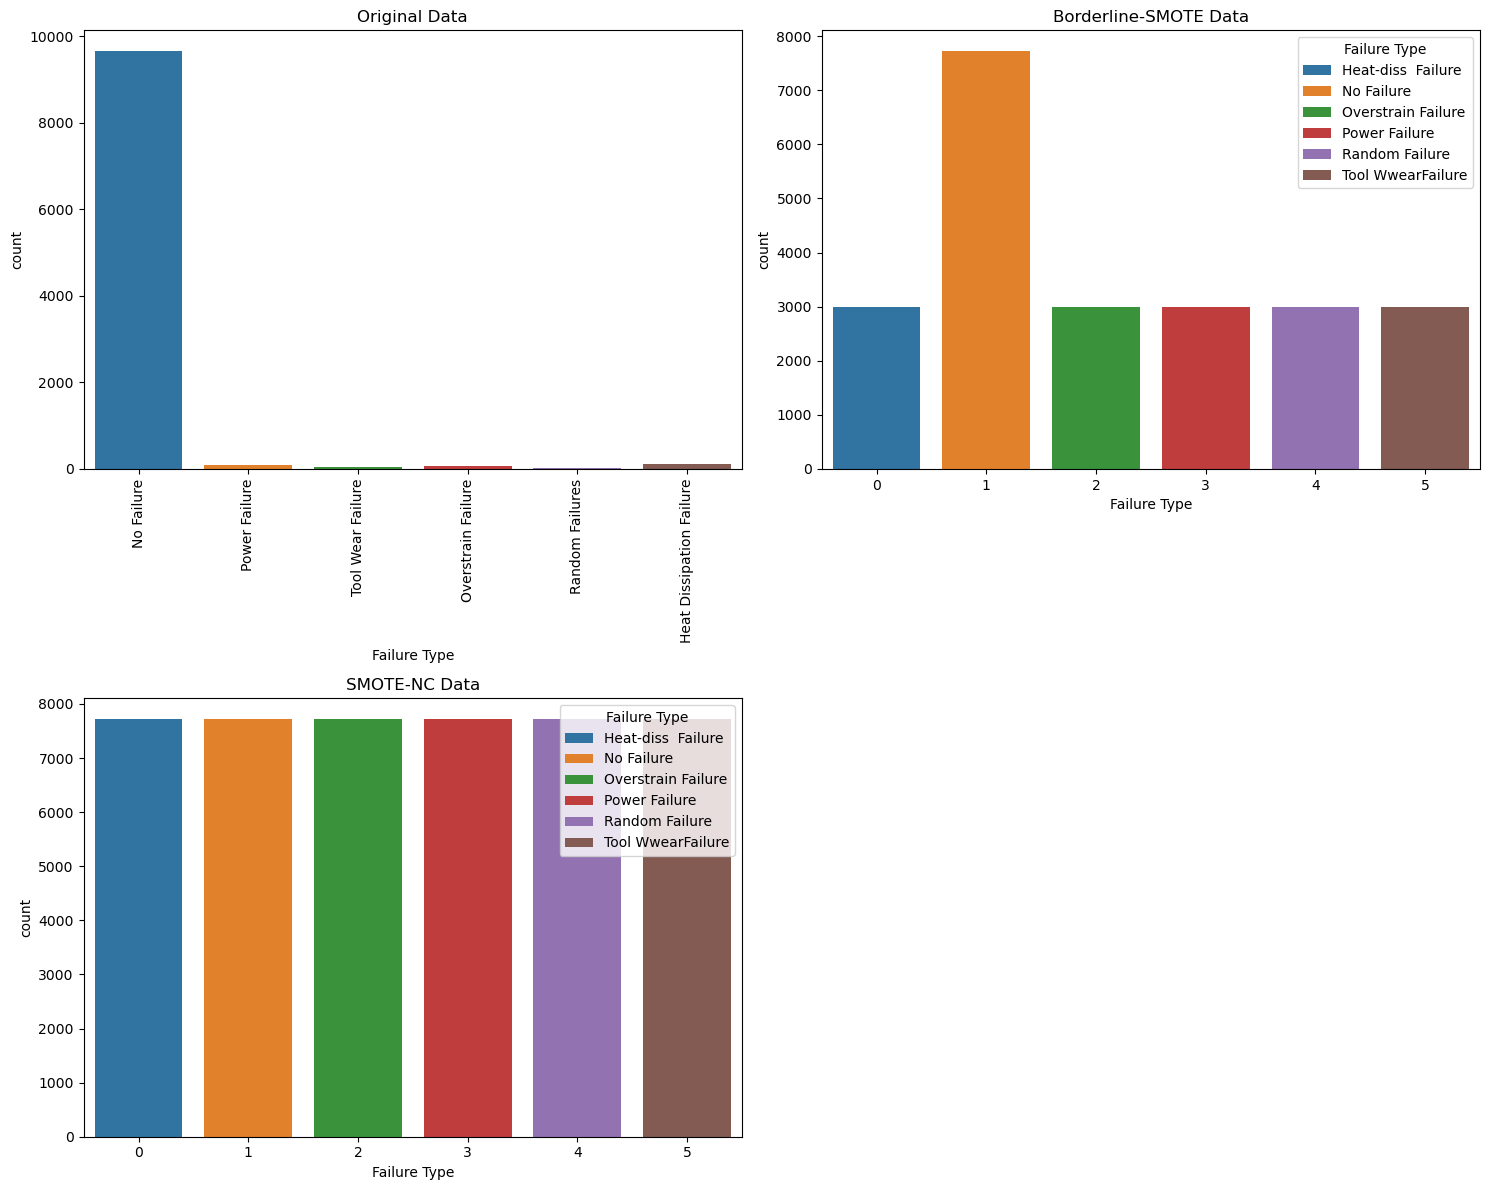

In [124]:
from matplotlib.patches import Patch

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
ax = sns.countplot(x='Failure Type', data=df)
plt.xticks(rotation=90)
plt.title("Original Data")

plt.subplot(2, 2, 2)
sns.countplot(x='Failure Type', data=df2)
plt.title("Borderline-SMOTE Data")
colors = [patch.get_facecolor() for patch in ax.patches[:6]]  
labels = ['Heat-diss  Failure', 'No Failure', 'Overstrain Failure',
          'Power Failure', 'Random Failure', 'Tool WwearFailure']
legend_handles = [Patch(facecolor=colors[i], label=labels[i]) for i in range(len(labels))]
plt.legend(handles=legend_handles, title='Failure Type')

plt.subplot(2, 2, 3)
sns.countplot(x='Failure Type', data=df3)
plt.title("SMOTE-NC Data")
colors = [patch.get_facecolor() for patch in ax.patches[:6]]  
labels = ['Heat-diss  Failure', 'No Failure', 'Overstrain Failure',
          'Power Failure', 'Random Failure', 'Tool WwearFailure']
legend_handles = [Patch(facecolor=colors[i], label=labels[i]) for i in range(len(labels))]
plt.legend(handles=legend_handles, title='Failure Type')
plt.tight_layout()
plt.show()

In [17]:
df1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Failure Type,y_labels
0,2,0.197519,1.209468,-0.986060,0.763720,1,No Failure
1,2,-0.152453,-0.475554,-0.779674,0.191915,5,Tool Wear Failure
2,2,0.897464,-0.273351,-0.573287,0.904163,1,No Failure
3,1,0.197519,-0.071148,0.157433,-0.349795,1,No Failure
4,2,-0.952389,-1.419166,-0.902390,1.516095,1,No Failure


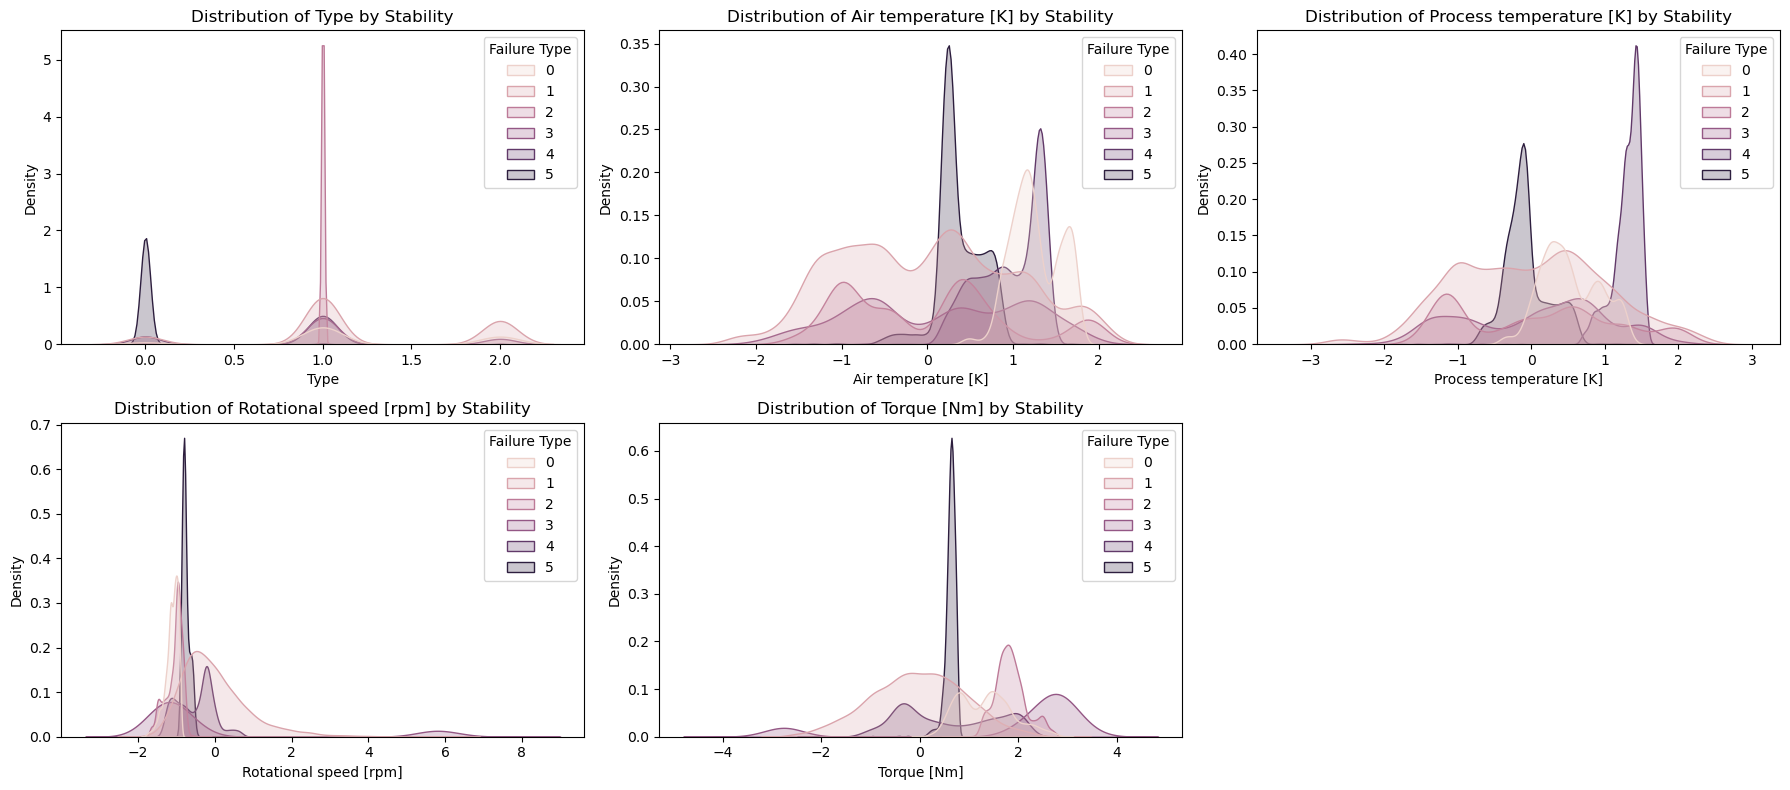

Feature distributions by stability class visualized.


In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Number of plots
a = pd.read_csv('boderline_smote_data.csv')
b = pd.read_csv('smote_nc_data.csv')

continuous = ['Type', 'Air temperature [K]', 'Process temperature [K]', 
              'Rotational speed [rpm]', 'Torque [Nm]']

n = len(continuous)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 6, rows * 4))

for idx, col in enumerate(continuous):
    plt.subplot(rows, cols, idx + 1)
    sns.kdeplot(data=a, x=col, hue='Failure Type', fill=True)
    plt.title(f'Distribution of {col} by Failure Type')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()
print("Feature distributions by failure class visualized.")

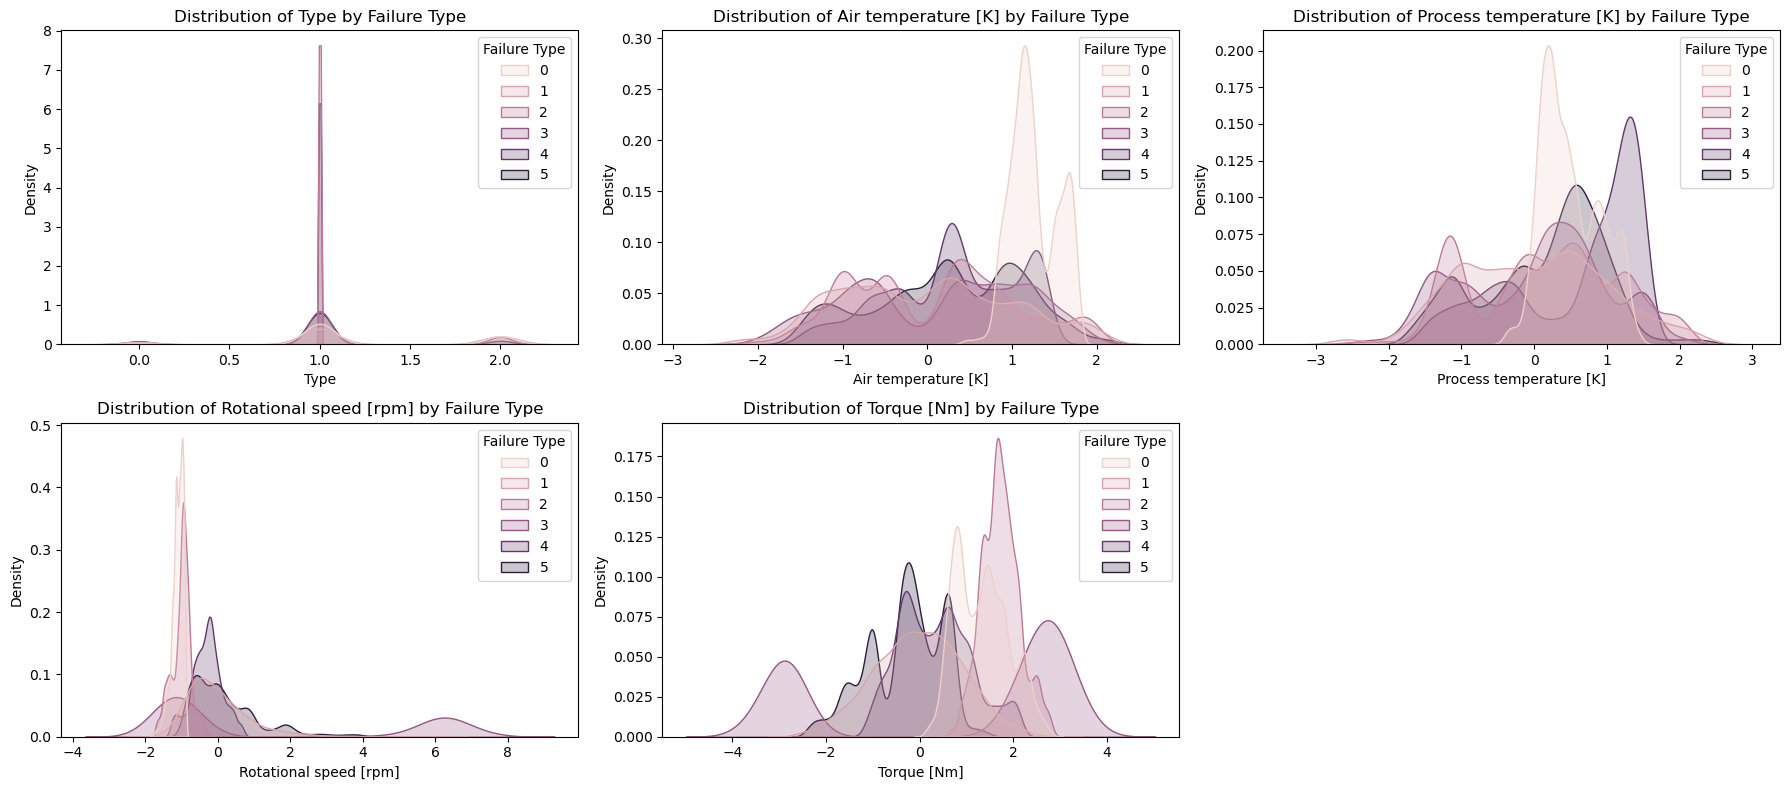

Feature distributions by failure class visualized.


In [20]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Number of plots
a = pd.read_csv('boderline_smote_data.csv')
b = pd.read_csv('smote_nc_data.csv')

continuous = ['Type', 'Air temperature [K]', 'Process temperature [K]', 
              'Rotational speed [rpm]', 'Torque [Nm]']

n = len(continuous)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 6, rows * 4))

for idx, col in enumerate(continuous):
    plt.subplot(rows, cols, idx + 1)
    sns.kdeplot(data=b, x=col, hue='Failure Type', fill=True)
    plt.title(f'Distribution of {col} by Failure Type')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()
print("Feature distributions by failure class visualized.")

# Modelling

## Boderline-SMOTE

### ML

In [3]:
df1 = pd.read_csv('boderline_smote_data.csv')

In [4]:
df1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Failure Type,y_labels
0,2,0.197519,1.209468,-0.986060,0.763720,1,No Failure
1,2,-0.152453,-0.475554,-0.779674,0.191915,5,Tool Wear Failure
2,2,0.897464,-0.273351,-0.573287,0.904163,1,No Failure
3,1,0.197519,-0.071148,0.157433,-0.349795,1,No Failure
4,2,-0.952389,-1.419166,-0.902390,1.516095,1,No Failure


In [5]:
labels = df1[['Failure Type', 'y_labels']]

In [6]:
labels.head()

,Failure Type,y_labels
0,1,No Failure
1,5,Tool Wear Failure
2,1,No Failure
3,1,No Failure
4,1,No Failure


In [7]:
x = df1.drop(['Failure Type', 'y_labels'], axis=1)
y = df1['Failure Type']

In [8]:
x.shape, y.shape

((22722, 5), (22722,))

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18177, 5), (4545, 5), (18177,), (4545,))

In [11]:
from sklearn.metrics import accuracy_score, precision_score

In [17]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred)* 100)
print("Precision:", precision_score(y_test, y_pred, average='weighted')*100)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 98.94389438943895
Precision: 98.94706554215854
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       0.99      0.98      0.98      1545
           2       0.98      0.99      0.98       600
           3       0.99      0.99      0.99       600
           4       0.99      1.00      0.99       600
           5       1.00      0.99      0.99       600

    accuracy                           0.99      4545
   macro avg       0.99      0.99      0.99      4545
weighted avg       0.99      0.99      0.99      4545

Confusion Matrix:
[[ 600    0    0    0    0    0]
 [   2 1516   14    5    7    1]
 [   0    5  595    0    0    0]
 [   0    4    0  596    0    0]
 [   0    2    0    0  598    0]
 [   0    8    0    0    0  592]]


In [18]:
# SVM
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm)*100)
print("SVM Precision:", precision_score(y_test, y_pred_svm, average='weighted')*100)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 88.03080308030803
SVM Precision: 88.79222374011017
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       600
           1       0.95      0.81      0.88      1545
           2       0.72      0.83      0.77       600
           3       0.98      1.00      0.99       600
           4       0.69      0.76      0.72       600
           5       0.96      0.99      0.97       600

    accuracy                           0.88      4545
   macro avg       0.87      0.90      0.88      4545
weighted avg       0.89      0.88      0.88      4545

SVM Confusion Matrix:
[[ 600    0    0    0    0    0]
 [  29 1258   76    6  149   27]
 [   7   37  498    6   52    0]
 [   0    0    0  600    0    0]
 [   0   27  120    0  453    0]
 [   0    8    0    0    0  592]]


In [14]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn)*100)
print("KNN Precision:", precision_score(y_test, y_pred_knn, average='weighted')*100)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 98.06380638063807
KNN Precision: 98.11013224544074
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       600
           1       0.99      0.95      0.97      1545
           2       0.95      0.99      0.97       600
           3       0.99      1.00      1.00       600
           4       0.96      1.00      0.98       600
           5       0.99      0.99      0.99       600

    accuracy                           0.98      4545
   macro avg       0.98      0.99      0.98      4545
weighted avg       0.98      0.98      0.98      4545

KNN Confusion Matrix:
[[ 600    0    0    0    0    0]
 [   9 1469   31    4   26    6]
 [   1    3  596    0    0    0]
 [   0    1    0  599    0    0]
 [   0    0    0    0  600    0]
 [   0    7    0    0    0  593]]


In [15]:
# LOR
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(max_iter=1000, random_state=42)
lor.fit(x_train, y_train)

y_pred_lor = lor.predict(x_test)

print("LOR Accuracy:", accuracy_score(y_test, y_pred_lor)*100)
print("LOR Precision:", precision_score(y_test, y_pred_lor, average='weighted')*100)

print("LOR Classification Report:")
print(classification_report(y_test, y_pred_lor))
print("LOR Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lor))

LOR Accuracy: 85.6985698569857
LOR Precision: 85.62174553027553
LOR Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       600
           1       0.88      0.83      0.86      1545
           2       0.71      0.79      0.75       600
           3       0.97      1.00      0.99       600
           4       0.65      0.60      0.62       600
           5       0.93      0.99      0.96       600

    accuracy                           0.86      4545
   macro avg       0.85      0.86      0.86      4545
weighted avg       0.86      0.86      0.86      4545

LOR Confusion Matrix:
[[ 588    3    1    2    0    6]
 [  25 1281   72    7  122   38]
 [   5   38  472    9   76    0]
 [   0    0    0  600    0    0]
 [   0  121  118    0  361    0]
 [   0    7    0    0    0  593]]


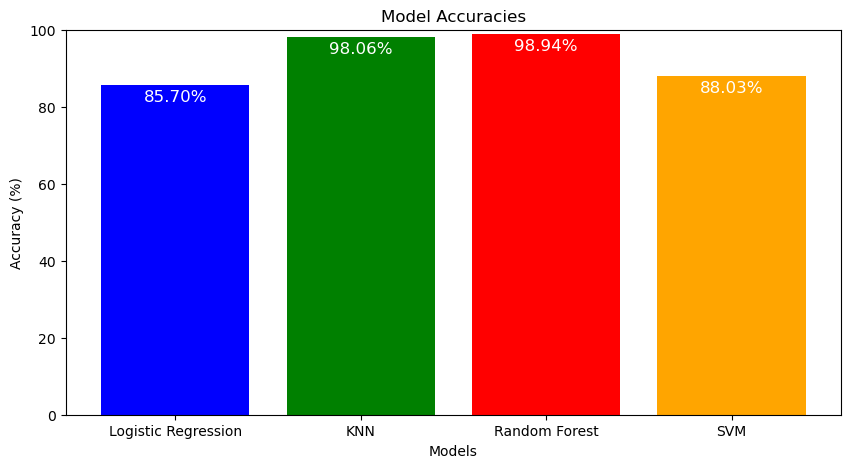

In [16]:
import matplotlib.pyplot as plt

accuracies = {
    'Logistic Regression': 85.698,
    'KNN': 98.06,
    'Random Forest': 98.94,
    'SVM': 88.03
}

models = list(accuracies.keys())
values = list(accuracies.values())
colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(10, 5))
bars = plt.bar(models, values, color=colors)


for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{value:.2f}%', 
             ha='center', va='bottom', color='white', fontsize=12)

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.ylim(0, 100) 
plt.show()

In [22]:
import joblib
joblib.dump(rf, 'models/boderline-smote/randomforest.joblib')

['models/boderline-smote/randomforest.joblib']

In [57]:
# Cross-Validation RFC

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross_val_score with accuracy
scores = cross_val_score(rf, x, y, cv=cv, scoring='accuracy')

print("Cross-validated accuracies for each fold:", scores)
print("Mean Accuracy:", np.mean(scores))


Cross-validated accuracies for each fold: [0.98877888 0.98877888 0.9881162  0.99383803 0.98943662]
Mean Accuracy: 0.9897897201692001


In [58]:
import numpy as np
import pandas as pd

def predict_failure(user_input_dict, model, scaler):
    """
    Predict failure type based on user input.

    Parameters:
    - user_input_dict: dict of input values (e.g., from a form or CLI)
    - model: trained model object
    - scaler: fitted StandardScaler object

    Returns:
    - Encoded predicted class (int)
    """
    # Define column order and mapping
    columns = ['Type', 'Air temperature [K]', 'Process temperature [K]',
               'Rotational speed [rpm]', 'Torque [Nm]']
    type_map = {'L': 0, 'M': 1, 'H': 2}

    # Convert input to DataFrame
    input_df = pd.DataFrame([user_input_dict], columns=columns)

    # Map 'Type' to numeric and fill NaN if unmapped
    input_df['Type'] = input_df['Type'].map(type_map)

    if input_df['Type'].isnull().any():
        raise ValueError(f"Invalid 'Type' value provided: {user_input_dict['Type']} (must be one of {list(type_map.keys())})")

    # Normalize numerical columns
    numeric_cols = ['Air temperature [K]', 'Process temperature [K]',
                    'Rotational speed [rpm]', 'Torque [Nm]']
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])

    # Final check for NaNs
    if input_df.isnull().any().any():
        raise ValueError("Processed input contains NaNs. Please check input values.")

    # Predict using the model
    pred = model.predict(input_df)
    return pred[0]


In [28]:


user_input = {
    'Type': '2',
    'Air temperature [K]': -0.15,
    'Process temperature [K]': -0.47,
    'Rotational speed [rpm]': -0.77967,
    'Torque [Nm]': 0.1919
}

rf = joblib.load('models/boderline-smote/randomforest.joblib')
rf2 = joblib.load('models/smote-nc/randomforest.joblib')
# Direct prediction using the trained model and scaler
pred = rf.predict(pd.DataFrame([user_input]))
pred2 = rf2.predict(pd.DataFrame([user_input]))
# predicted_failure_type = le.inverse_transform(pred)[0]
print("Predicted Failure Type:", pred)
print("Predicted Failure Type (SMOTE-NC):", pred2)

# prediction = predict_failure(user_input, rf, scaler)
# print("Predicted Failure Type:", prediction)


Predicted Failure Type: [5]
Predicted Failure Type (SMOTE-NC): [1]


### DL

In [1]:
import pandas as pd 
import tensorflow as tf

In [2]:
df1 = pd.read_csv('boderline_smote_data.csv')

In [3]:
x = df1.drop(['Failure Type', 'y_labels'], axis=1)
y = df1['Failure Type']
x.shape,y.shape

((22722, 5), (22722,))

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# X_border: Already numerical (including 'Type')
# y_border: Already label encoded (0-5)

X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(x, y, test_size=0.2, random_state=42)

# One-hot encode target
y_train_b_cat = to_categorical(y_train_b, num_classes=6)
y_val_b_cat = to_categorical(y_val_b, num_classes=6)

model_b = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_b.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(6, activation='softmax')
])

model_b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_b.fit(X_train_b, y_train_b_cat, validation_data=(X_val_b, y_val_b_cat),
            epochs=25, batch_size=32)


c:\Users\Integrated\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
569/569 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5659 - loss: 1.1484 - val_accuracy: 0.8684 - val_loss: 0.4147
Epoch 2/25
569/569 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8348 - loss: 0.4558 - val_accuracy: 0.9149 - val_loss: 0.2902
Epoch 3/25
569/569 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8821 - loss: 0.3456 - val_accuracy: 0.9322 - val_loss: 0.2391
Epoch 4/25
569/569 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9051 - loss: 0.2854 - val_accuracy: 0.9446 - val_loss: 0.2060
Epoch 5/25
569/569 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9173 - loss: 0.2613 - val_accuracy: 0.9424 - val_loss: 0.1850
Epoch 6/25
569/569 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9264 - loss: 0.2336 - val_accuracy: 0.9461 - val_loss: 0.1717
Epoch 7/25
569/569 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9322 - loss: 0.2187 - val_accuracy: 0.9536 - val_loss: 0.1547
Epoch 8/25
569/569 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9339 - loss: 0.2069 - val_accuracy: 0.

In [ ]:
from helper_functions import *

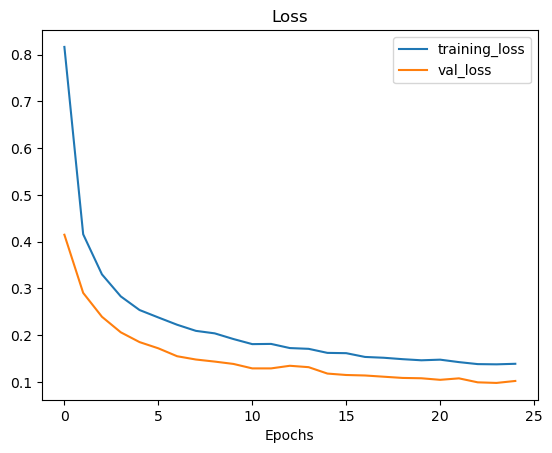

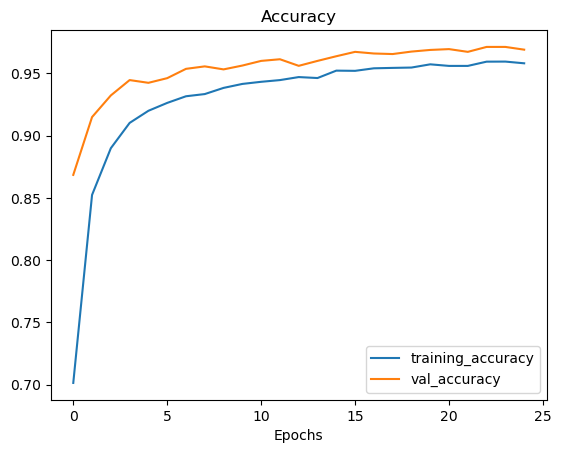

In [10]:
plot_loss_curves(model_b.history)

In [11]:
model_b.save('models/boderline-smote/baselineNN.h5')

In [13]:
# predict on user data with neural network

user_input = {
    'Type': '2',
    'Air temperature [K]': -0.15,
    'Process temperature [K]': -0.47,
    'Rotational speed [rpm]': -0.77967,
    'Torque [Nm]': 0.1919
}

pred = model_b.predict(pd.DataFrame([user_input]))
predicted_failure_type = np.argmax(pred, axis=1)[0]
print("Predicted Failure Type (Neural Network):", predicted_failure_type)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Failure Type (Neural Network): 1


## SMOTE-NC

### ML

In [14]:
df2 = pd.read_csv('smote_nc_data.csv')

In [15]:
df2.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Failure Type,y_labels
0,2,0.197519,1.209468,-0.986060,0.763720,1,No Failure
1,2,-0.152453,-0.475554,-0.779674,0.191915,5,Tool Wear Failure
2,2,0.897464,-0.273351,-0.573287,0.904163,1,No Failure
3,1,0.197519,-0.071148,0.157433,-0.349795,1,No Failure
4,2,-0.952389,-1.419166,-0.902390,1.516095,1,No Failure


In [16]:
df2['Failure Type'].value_counts()

Failure Type
1    7722
5    7722
4    7722
3    7722
0    7722
2    7722
Name: count, dtype: int64

In [17]:
labels = df1[['Failure Type', 'y_labels']]

In [18]:
x = df2.drop(['Failure Type', 'y_labels'], axis=1)
y = df2['Failure Type']

In [19]:
x.shape, y.shape

((46332, 5), (46332,))

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((37065, 5), (9267, 5), (37065,), (9267,))

In [22]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Precision:", precision_score(y_test, y_pred, average='weighted') * 100)
      
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 98.45689003992662


NameError: name 'precision_score' is not defined

In [24]:
import joblib
joblib.dump(rf, 'models/smote-nc/randomforest.joblib')

['models/smote-nc/randomforest.joblib']

In [46]:
# SVM
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm) * 100)
print("SVM Precision:", precision_score(y_test, y_pred_svm, average='weighted') * 100)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 74.39300744577532
SVM Precision: 73.55224638575157
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1519
           1       0.51      0.32      0.40      1571
           2       0.82      0.88      0.85      1562
           3       0.99      1.00      1.00      1559
           4       0.56      0.57      0.57      1499
           5       0.56      0.70      0.62      1557

    accuracy                           0.74      9267
   macro avg       0.74      0.74      0.74      9267
weighted avg       0.74      0.74      0.73      9267

SVM Confusion Matrix:
[[1519    0    0    0    0    0]
 [  16  510  117    9  314  605]
 [  34   18 1368    0  142    0]
 [   0    0    0 1553    0    6]
 [   0  222  172    0  849  256]
 [   0  258    6    0  198 1095]]


In [47]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn) * 100)
print("KNN Precision:", precision_score(y_test, y_pred_knn, average='weighted') * 100)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 96.20157548289629
KNN Precision: 96.46315872710689
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1519
           1       1.00      0.78      0.88      1571
           2       0.97      1.00      0.98      1562
           3       1.00      1.00      1.00      1559
           4       0.94      1.00      0.97      1499
           5       0.90      0.99      0.94      1557

    accuracy                           0.96      9267
   macro avg       0.96      0.96      0.96      9267
weighted avg       0.96      0.96      0.96      9267

KNN Confusion Matrix:
[[1519    0    0    0    0    0]
 [   9 1230   53    5   94  180]
 [   0    0 1561    1    0    0]
 [   0    0    0 1559    0    0]
 [   0    1    1    0 1497    0]
 [   0    4    1    0    3 1549]]


In [48]:
# LOR
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(max_iter=1000, random_state=42)
lor.fit(x_train, y_train)

y_pred_lor = lor.predict(x_test)

print("LOR Accuracy:", accuracy_score(y_test, y_pred_lor) * 100)
print("LOR Precision:", precision_score(y_test, y_pred_lor, average='weighted') * 100)

print("LOR Classification Report:")
print(classification_report(y_test, y_pred_lor))
print("LOR Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lor))

LOR Accuracy: 72.22402071867918
LOR Precision: 71.29833319475748
LOR Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1519
           1       0.51      0.37      0.43      1571
           2       0.81      0.85      0.83      1562
           3       0.99      0.99      0.99      1559
           4       0.53      0.53      0.53      1499
           5       0.53      0.60      0.56      1557

    accuracy                           0.72      9267
   macro avg       0.71      0.72      0.72      9267
weighted avg       0.71      0.72      0.72      9267

LOR Confusion Matrix:
[[1512    0    7    0    0    0]
 [  17  577  114    8  334  521]
 [  65   20 1324   13  140    0]
 [   5    0    0 1548    0    6]
 [   0  212  192    0  800  295]
 [  43  333    4    1  244  932]]


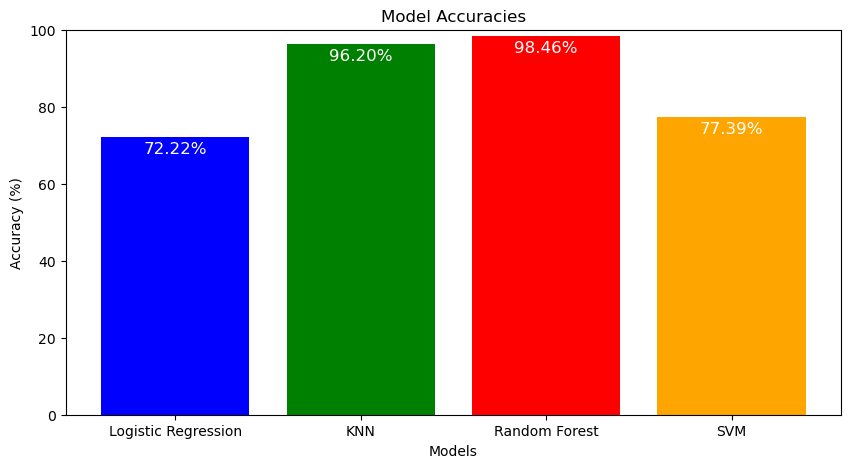

In [49]:
# Comparing model accuracies
import matplotlib.pyplot as plt

accuracies = {
    'Logistic Regression': 72.22,
    'KNN': 96.20,
    'Random Forest': 98.46,
    'SVM': 77.39
}

models = list(accuracies.keys())
values = list(accuracies.values())
colors = ['blue', 'green', 'red', 'orange']
plt.figure(figsize=(10, 5))
bars = plt.bar(models, values, color=colors)
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{value:.2f}%', 
             ha='center', va='bottom', color='white', fontsize=12)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.ylim(0, 100)
plt.show()

In [63]:
# Cross-Validation RFC

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross_val_score with accuracy
scores = cross_val_score(rf, x, y, cv=cv, scoring='accuracy')

print("Cross-validated accuracies for each fold:", scores)
print("Mean Accuracy:", np.mean(scores))


Cross-validated accuracies for each fold: [0.98467681 0.98737455 0.98456724 0.98607814 0.98510684]
Mean Accuracy: 0.9855607154896383


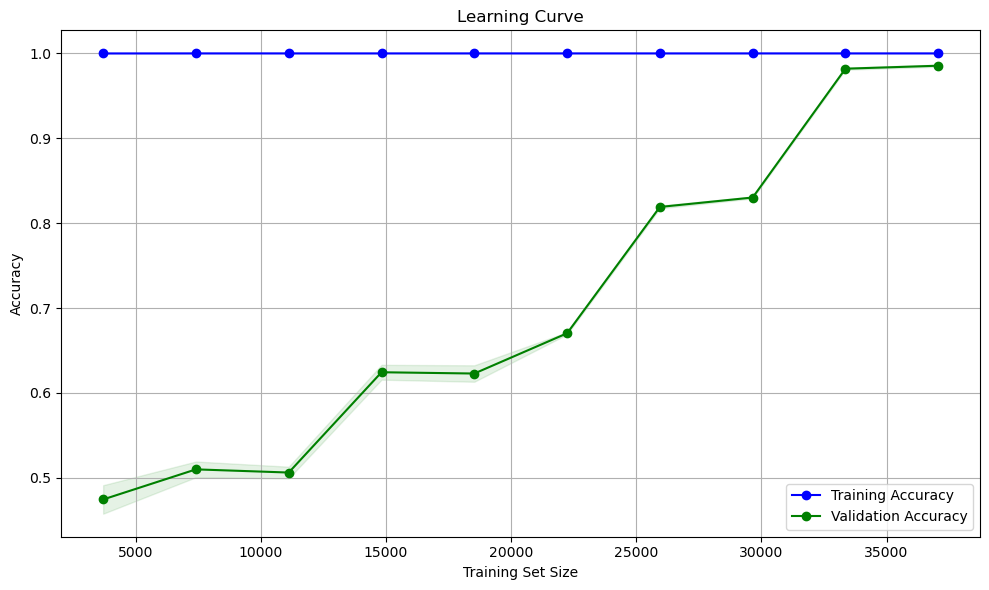

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_digits  # or your own dataset
from sklearn.ensemble import RandomForestClassifier  # or your model

# Example dataset — replace with your own
# x, y = load_digits(return_x_y=True)

# Your model — replace with your own model
model = RandomForestClassifier()

# Create cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Get learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=x,
    y=y,
    cv=cv,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Validation Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


### DL

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model

# Split categorical and numerical
cat_input = X_nc[['Type']].values
num_input = X_nc.drop(columns=['Type']).values
y_nc_cat = to_categorical(y_nc, num_classes=6)

cat_train, cat_val, num_train, num_val, y_train, y_val = train_test_split(
    cat_input, num_input, y_nc_cat, test_size=0.2, random_state=42
)

# Categorical input (Type has 3 categories: 0,1,2)
input_cat = Input(shape=(1,))
embed_cat = Embedding(input_dim=3, output_dim=2)(input_cat)
flat_cat = Flatten()(embed_cat)

# Numerical input
input_num = Input(shape=(num_train.shape[1],))

# Combine
merged = Concatenate()([flat_cat, input_num])
dense = Dense(64, activation='relu')(merged)
dense = Dropout(0.3)(dense)
dense = Dense(32, activation='relu')(dense)
output = Dense(6, activation='softmax')(dense)

model_nc = Model(inputs=[input_cat, input_num], outputs=output)

model_nc.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_nc.fit([cat_train, num_train], y_train, validation_data=([cat_val, num_val], y_val),
             epochs=25, batch_size=32)
